https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd

In [2]:
temperature_data = pd.read_csv("./data/temps.csv")
temperature_data.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [ ]:
# info
temperature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [6]:
temperature_data.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [13]:
temperature_data.loc[:,"actual"].unique()

array([45, 44, 41, 40, 51, 48, 50, 52, 49, 55, 54, 57, 56, 47, 46, 53, 62,
       58, 60, 59, 61, 64, 63, 68, 73, 71, 69, 77, 76, 66, 89, 81, 65, 87,
       74, 82, 67, 75, 79, 80, 92, 86, 85, 70, 78, 72, 83, 88, 90, 84, 42,
       36, 43, 39, 35])

In [14]:
# valores unicos de la columna week
temperature_data.loc[:,"week"].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [ ]:
# valores de la columna week
temperature_data.loc[:,"week"].values

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun',
       'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'We

ESTO ES UN CODIGO PARA CAMBIAR CATEGORIAS A VALORES DE FORMA AUTOMATICA. ESTO COGE TODOS ESOS VALORES UNICOS DE WEEK Y LES ASIGNA UN NUMERO A CADA UNO. OJO!! NO TIENE PORQUE SER LUNES 1, MARTES 2, MIERCOLES 3 AND SO ON

In [4]:
# usamos todos los datos (sin train ni test) pero esto habria que negociarlo...
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(temperature_data['week'])
le.transform(temperature_data['week'])

array([0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5,
       6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 5, 3, 5, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,

OTRA FORMA SERIA HACER COLUMNAS DUMMIES:

In [3]:
pd.get_dummies(temperature_data['week']).astype(int)

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
343,0,0,0,0,0,1,0
344,0,0,0,0,0,0,1
345,0,0,0,0,1,0,0
346,1,0,0,0,0,0,0


In [23]:
temperature_data['week'].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [8]:
#Reemplaza el valor de la columna week con un diccionario
days_dict = {'Mon': 0, 'Tues' : 1, 'Wed' : 2, 'Thurs' : 3, 'Fri' : 4, 'Sat' : 5, 'Sun' : 6}
temperature_data.loc[:,'week'] = temperature_data.loc[:,'week'].replace(days_dict)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21768\3498607212.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temperature_data.loc[:,'week'] = temperature_data.loc[:,'week'].replace(days_dict)


In [5]:
# Alternativa
temperature_data.loc[:,"week"] = temperature_data.loc[:,"week"].apply(lambda x: days_dict[x])
temperature_data.head(5)

NameError: name 'days_dict' is not defined

In [4]:
def finde(dia):
    if dia in ["Sat", "Sun"]:
        return 1
    else:
        return 0

temperature_data["week"].apply(finde)

0      0
1      1
2      1
3      0
4      0
      ..
343    0
344    0
345    0
346    0
347    1
Name: week, Length: 348, dtype: int64

PERO AL FINAL, USAMOS LA FORMA "MANUAL" 

In [7]:
temperature_data

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,4,45,45,45.6,45,43,50,44,29
1,2016,1,2,5,44,45,45.7,44,41,50,44,61
2,2016,1,3,6,45,44,45.8,41,43,46,47,56
3,2016,1,4,0,44,41,45.9,40,44,48,46,53
4,2016,1,5,1,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,1,42,42,45.2,47,41,50,47,47
344,2016,12,28,2,42,47,45.3,48,41,49,44,58
345,2016,12,29,3,47,48,45.3,48,43,50,45,65
346,2016,12,30,4,48,48,45.4,57,44,46,44,42


SI LOS DATOS SON MUY VARIABLES, A VECES INTERESA MODIFICAR UNA COLUMNA POR UN AGREGADO.
OS ACORDAIS DE LOS AGREGADOS? AQUI SE PIDE AGREGAR TEMPERATURA POR MES USANDO LA MEDIA:

In [40]:
temperature_data.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,4,45,45,45.6,45,43,50,44,29
1,2016,1,2,5,44,45,45.7,44,41,50,44,61
2,2016,1,3,6,45,44,45.8,41,43,46,47,56
3,2016,1,4,0,44,41,45.9,40,44,48,46,53
4,2016,1,5,1,41,40,46.0,44,46,46,46,41


In [9]:
months_g = temperature_data.groupby("month")["temp_1"].mean().reset_index()
months_g

,month,temp_1
0,1,49.677419
1,2,54.115385
2,3,56.483871
3,4,66.433333
4,5,68.838710
5,6,73.233333
6,7,76.225806
7,8,77.947368
8,9,70.428571
9,10,63.900000


ESTO LO DEJO. LO QUE HACEMOS ES UN JOIN PARA AGREGAR LA COLUMNA DE LA MEDIA MENSUAL AL DATO ORIGINAL
RECORDAD QUE NOS GENERARA UNA COLUMNA TEMP_1_X Y TEMP_1_Y POR QUE EL NOMBRE ESTA REPE

In [10]:
temperature_data = temperature_data.merge(months_g,on="month")
temperature_data

,year,month,day,week,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
0,2016,1,1,4,45,45,45.6,45,43,50,44,29,49.677419
1,2016,1,2,5,44,45,45.7,44,41,50,44,61,49.677419
2,2016,1,3,6,45,44,45.8,41,43,46,47,56,49.677419
3,2016,1,4,0,44,41,45.9,40,44,48,46,53,49.677419
4,2016,1,5,1,41,40,46.0,44,46,46,46,41,49.677419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,1,42,42,45.2,47,41,50,47,47,43.741935
344,2016,12,28,2,42,47,45.3,48,41,49,44,58,43.741935
345,2016,12,29,3,47,48,45.3,48,43,50,45,65,43.741935
346,2016,12,30,4,48,48,45.4,57,44,46,44,42,43.741935


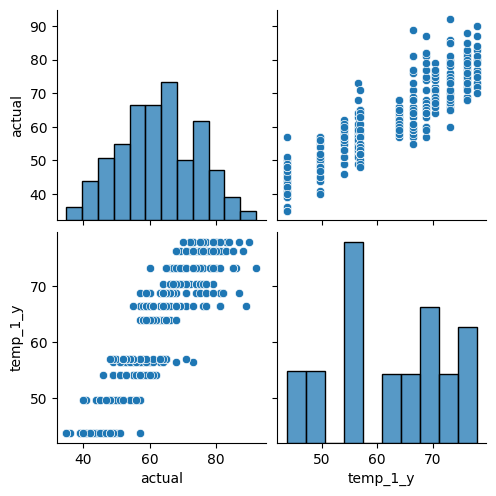

In [11]:
import seaborn as sns
sns.pairplot(temperature_data[['actual','temp_1_y']])

In [11]:
# temperature_data = temperature_data.drop(columns="temp_1")
temperature_data

,year,month,day,week,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
0,2016,1,1,4,45,45,45.6,45,43,50,44,29,49.677419
1,2016,1,2,5,44,45,45.7,44,41,50,44,61,49.677419
2,2016,1,3,6,45,44,45.8,41,43,46,47,56,49.677419
3,2016,1,4,0,44,41,45.9,40,44,48,46,53,49.677419
4,2016,1,5,1,41,40,46.0,44,46,46,46,41,49.677419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,1,42,42,45.2,47,41,50,47,47,43.741935
344,2016,12,28,2,42,47,45.3,48,41,49,44,58,43.741935
345,2016,12,29,3,47,48,45.3,48,43,50,45,65,43.741935
346,2016,12,30,4,48,48,45.4,57,44,46,44,42,43.741935


<Axes: >

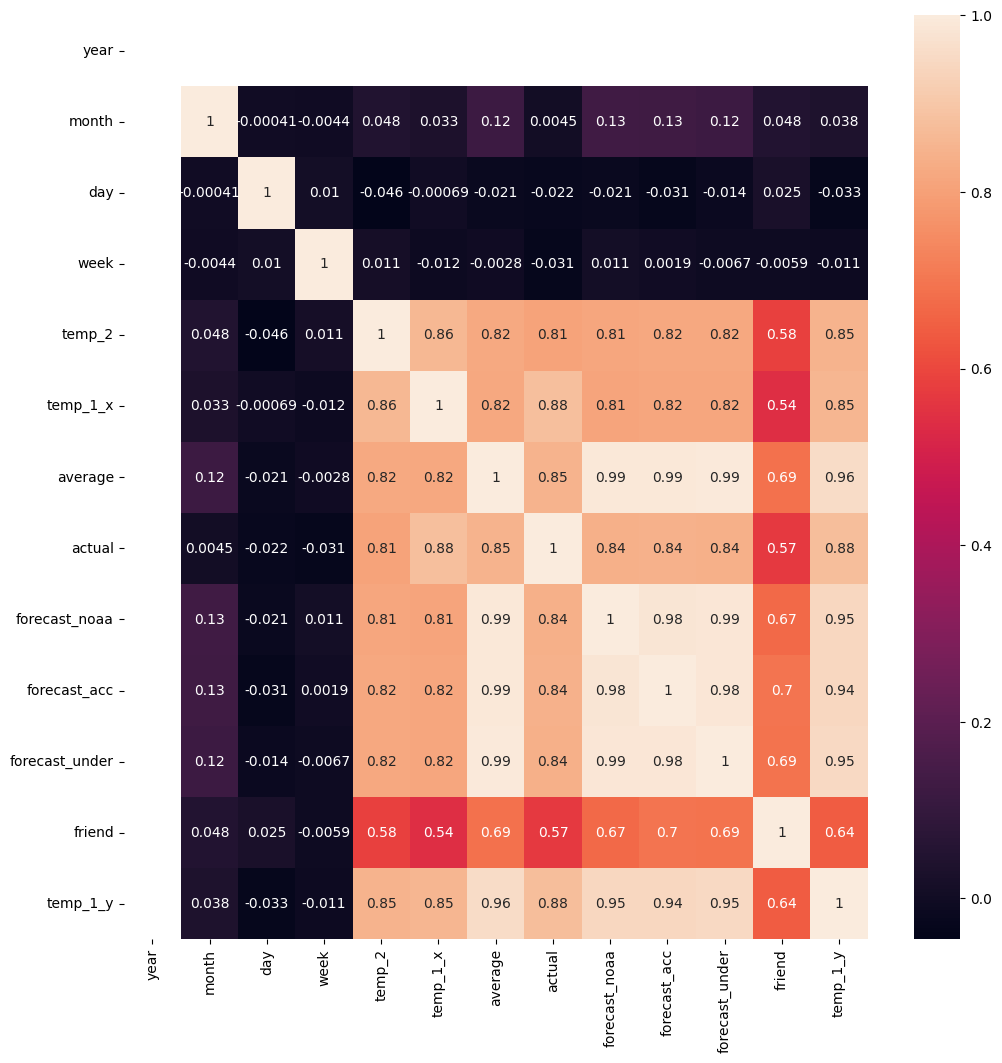

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
sns.heatmap(temperature_data.corr(),annot=True)

<AxesSubplot:>

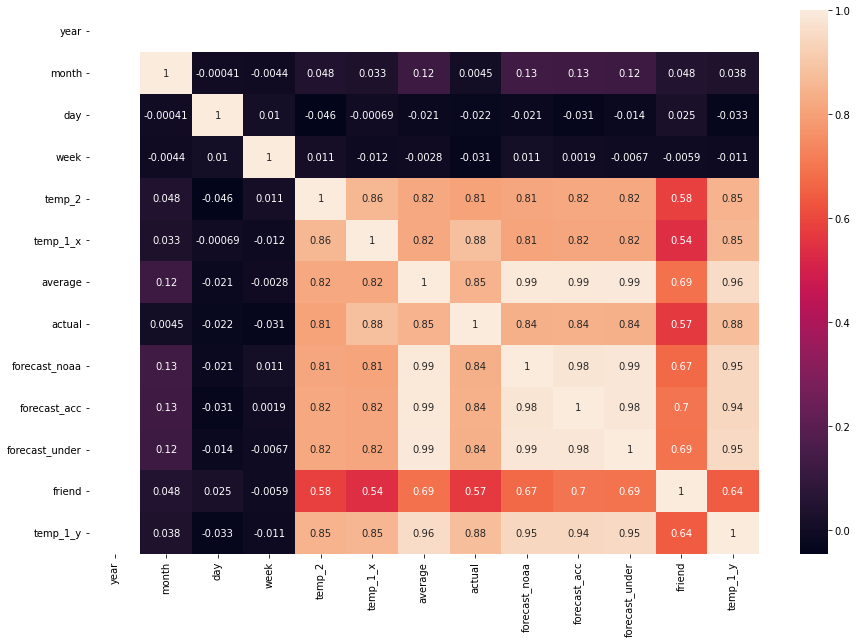

In [32]:
# HEATMAP

### 3. Divide en train y test

HACEMOS UN TRAIN TEST SPLIT DONDE QUITAMOS LAS COLUMNAS ['year','day','week'] Y USAMOS ACTUAL COMO TARGET

In [65]:
temperature_data.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1_x', 'average',
       'actual', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend',
       'temp_1_y'],
      dtype='object')

In [13]:
X = temperature_data.loc[:,['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend',
       'temp_1_y']]
y = temperature_data.loc[:,"actual"]

In [14]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [15]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("X_train", y_train.shape)
print("X_test", y_test.shape)

X_train (278, 9)
X_test (70, 9)
X_train (278,)
X_test (70,)


### 4. Entrena el modelo


In [16]:
from sklearn.tree import DecisionTreeRegressor
# el modelo se llama dtr
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)


DecisionTreeRegressor()

DecisionTreeRegressor()

In [94]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [17]:
dtr.feature_importances_

array([0.02034732, 0.02193964, 0.76571326, 0.11586681, 0.0163943 ,
       0.02004676, 0.0194307 , 0.01483933, 0.00542189])

In [36]:
# muestra la feature importance del modelo

array([0.01864284, 0.02306268, 0.76979138, 0.09715291, 0.01512062,
       0.02218712, 0.03053199, 0.0179435 , 0.00556695])

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [20]:
y_pred = dtr.predict(X_test)
y_pred 

array([77., 68., 57., 68., 72., 75., 73., 79., 68., 71., 68., 65., 39.,
       60., 75., 55., 65., 59., 57., 79., 61., 55., 70., 55., 63., 49.,
       66., 45., 58., 77., 66., 68., 57., 79., 75., 60., 51., 48., 74.,
       40., 77., 59., 81., 41., 60., 76., 56., 87., 51., 39., 40., 39.,
       67., 64., 74., 57., 55., 61., 60., 57., 60., 46., 60., 71., 68.,
       59., 71., 67., 80., 39.])

In [58]:
y_pred = ...
y_pred

array([80., 68., 57., 64., 72., 76., 73., 79., 68., 81., 68., 67., 39.,
       59., 78., 57., 63., 54., 55., 79., 63., 57., 70., 59., 64., 48.,
       66., 45., 60., 77., 66., 64., 57., 88., 73., 60., 51., 51., 74.,
       40., 77., 54., 81., 41., 58., 76., 55., 79., 52., 39., 40., 39.,
       63., 64., 74., 61., 55., 61., 60., 57., 60., 46., 60., 71., 68.,
       57., 71., 67., 80., 39.])

In [21]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.6807240521700548
MAE 5.271428571428571
MAPE 0.08398017408438603
MSE 44.642857142857146
RMSE 6.68153104781061


In [59]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7207740270658431
MAE 4.985714285714286
MAPE 0.08014862331935532
MSE 39.042857142857144
RMSE 6.248428373827865


In [18]:
# Probamos con las tablas de train
print("Coeficiente determinación", r2_score(y_train, dtr.predict(X_train)))
print("MAE", mean_absolute_error(y_train, dtr.predict(X_train)))
print("MAPE", mean_absolute_percentage_error(y_train, dtr.predict(X_train)))
print("MSE", mean_squared_error(y_train, dtr.predict(X_train)))
print("RMSE", np.sqrt(mean_squared_error(y_train, dtr.predict(X_train))))

NameError: name 'r2_score' is not defined

In [ ]:
# NO DEBERIA SER TAN BUENO PREDICIENDO LA MUESTRA. 
# Vemos que hay un gap entre el error del training y el error del test. 
# La diferencia es abismal, por lo que el punto esta muy a la derecha de la gráfica, es un overfitting tremendo.
print("Coeficiente determinación", r2_score(y_train, dtr.predict(X_train)))
print("MAE", mean_absolute_error(y_train, dtr.predict(X_train)))
print("MAPE", mean_absolute_percentage_error(y_train, dtr.predict(X_train)))
print("MSE", mean_squared_error(y_train, dtr.predict(X_train)))
print("RMSE", np.sqrt(mean_squared_error(y_train, dtr.predict(X_train))))

Coeficiente determinación 1.0
MAE 0.0
MAPE 0.0
MSE 0.0
RMSE 0.0


### 6. Representa el árbol de decision

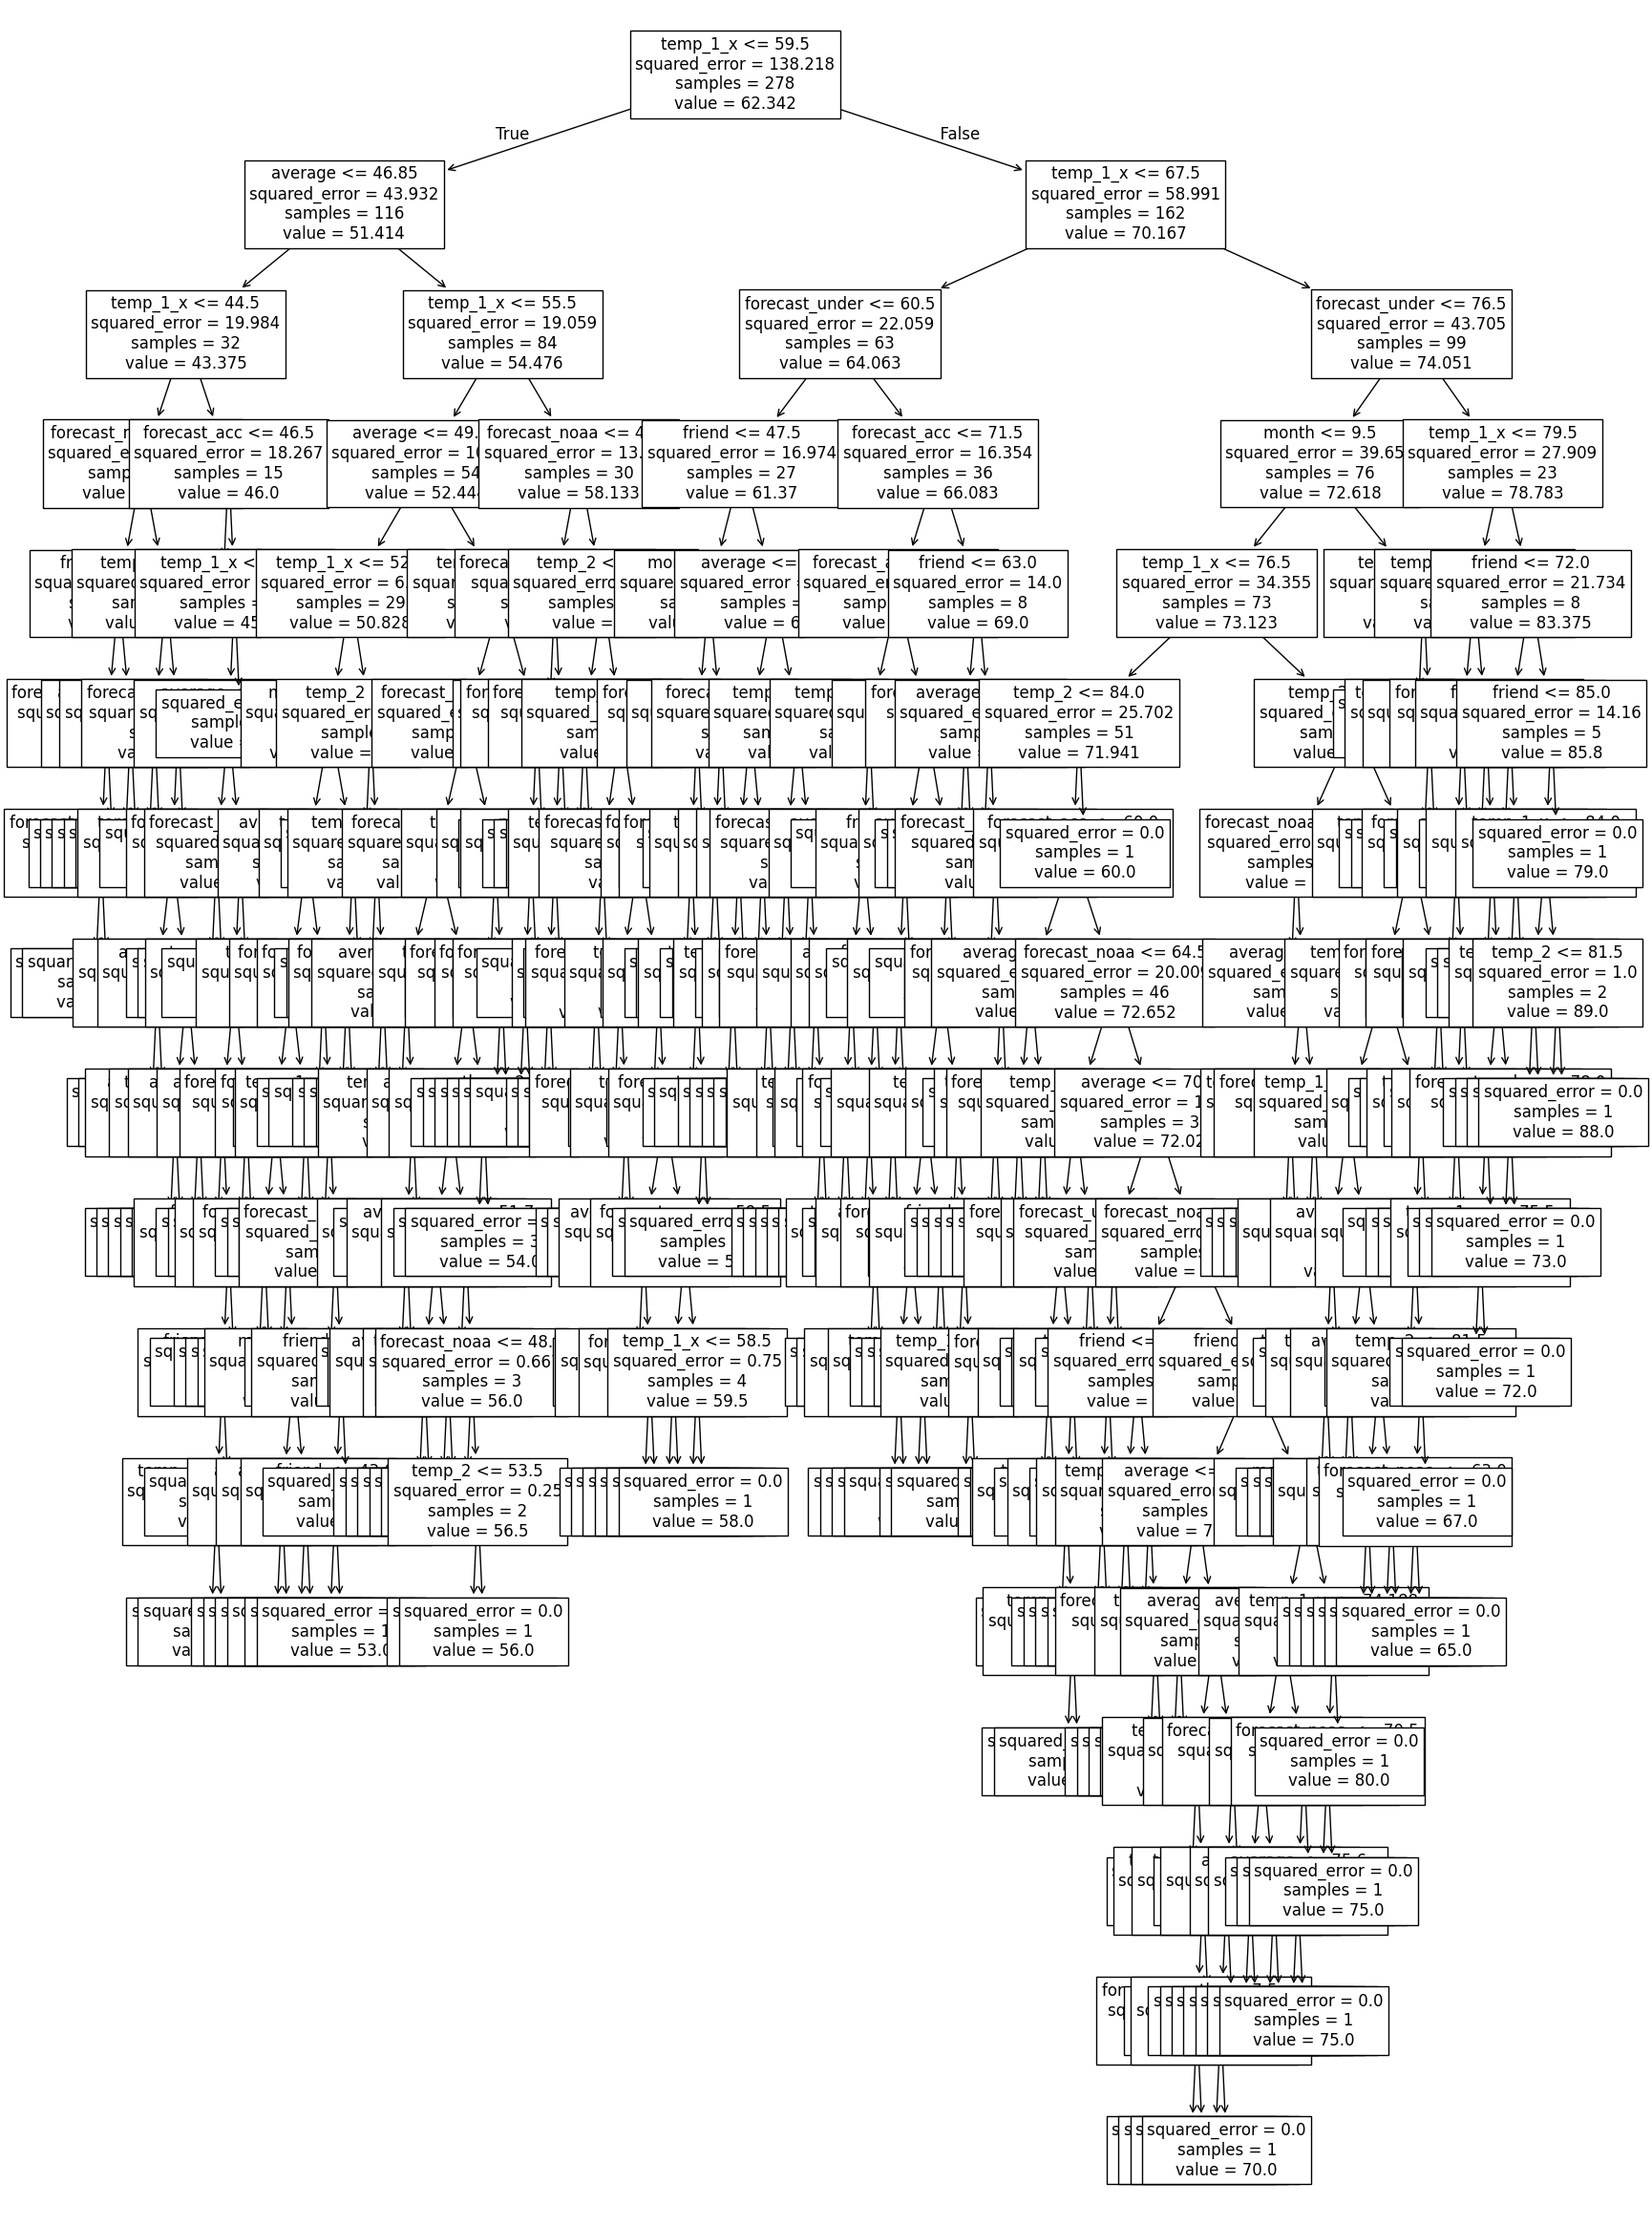

In [34]:
from  sklearn.tree import plot_tree
plt.figure(figsize=(20, 30))  # Ajusta el tamaño del gráfico
plot_tree(dtr,
          feature_names=X_test.columns,
          fontsize=12)            # Tamaño del texto
plt.show()

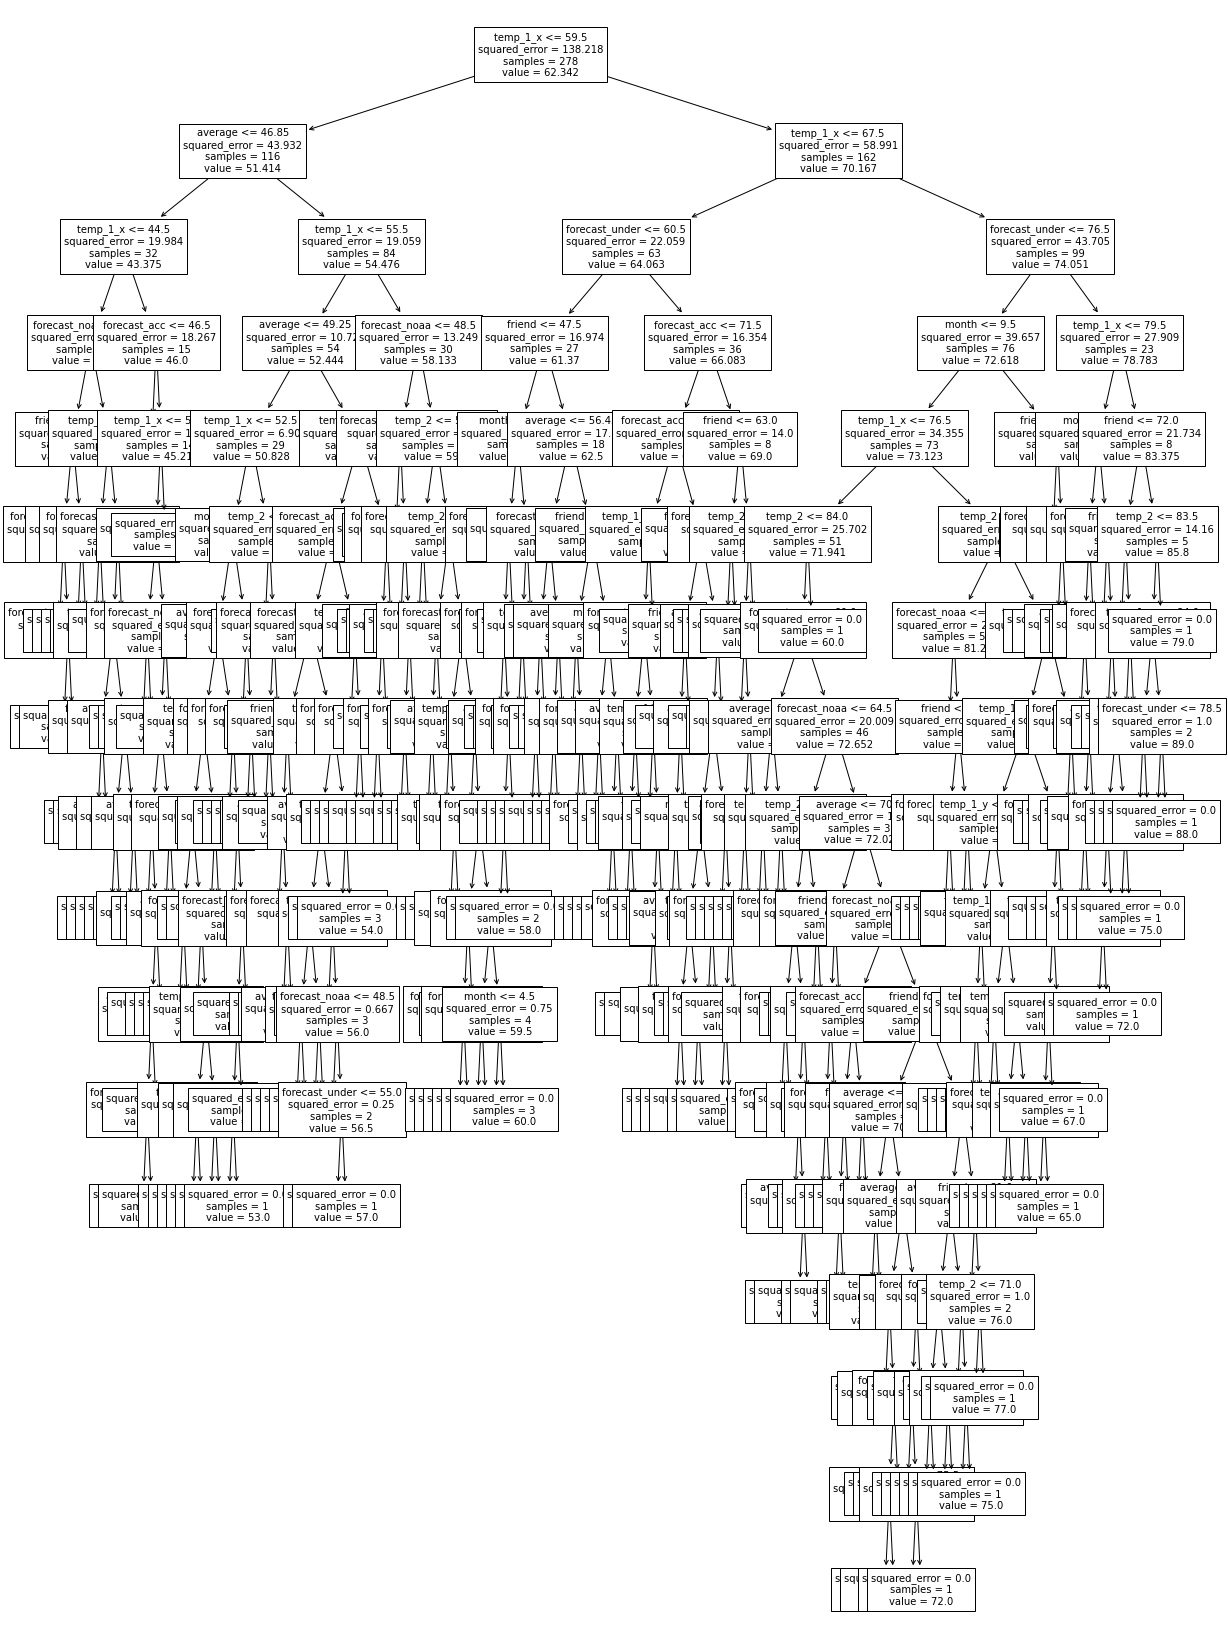

In [ ]:
plt.figure(figsize=(20,30))

# SI LO HABEIS HECHO BIEN, ENTENDEREIS PORQUE USAMOS max_depth PARA CAMBIAR la profundidad de la visualización

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [23]:
# dtr3 = ...
dtr3 = DecisionTreeRegressor(max_depth=3)
dtr3

DecisionTreeRegressor(max_depth=3)

In [60]:
# dtr3 = ...

DecisionTreeRegressor(max_depth=3)

### 8. Vuelve a evaluar tu modelo

In [24]:
dtr3.fit(X_train,y=y_train)

DecisionTreeRegressor(max_depth=3)

In [25]:
y_pred3 = dtr3.predict(X_test)
y_pred3

array([72.61842105, 66.08333333, 52.44444444, 61.37037037, 66.08333333,
       72.61842105, 72.61842105, 72.61842105, 61.37037037, 72.61842105,
       61.37037037, 72.61842105, 41.05882353, 61.37037037, 72.61842105,
       58.13333333, 61.37037037, 52.44444444, 58.13333333, 72.61842105,
       66.08333333, 58.13333333, 66.08333333, 61.37037037, 58.13333333,
       52.44444444, 66.08333333, 46.        , 58.13333333, 78.7826087 ,
       72.61842105, 66.08333333, 58.13333333, 78.7826087 , 78.7826087 ,
       61.37037037, 52.44444444, 52.44444444, 72.61842105, 46.        ,
       72.61842105, 52.44444444, 72.61842105, 41.05882353, 61.37037037,
       72.61842105, 52.44444444, 78.7826087 , 52.44444444, 41.05882353,
       46.        , 41.05882353, 66.08333333, 66.08333333, 72.61842105,
       61.37037037, 58.13333333, 58.13333333, 52.44444444, 58.13333333,
       66.08333333, 52.44444444, 61.37037037, 72.61842105, 61.37037037,
       58.13333333, 72.61842105, 72.61842105, 78.7826087 , 41.05

In [26]:
print("Coeficiente determinación", r2_score(y_test, y_pred3))
print("MAE", mean_absolute_error(y_test, y_pred3))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred3))
print("MSE", mean_squared_error(y_test, y_pred3))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred3)))

Coeficiente determinación 0.7560526120516178
MAE 4.5567196265742504
MAPE 0.07147155657048516
MSE 34.11001819765438
RMSE 5.840378258097191


In [39]:
# Este era el antrerior, vemos que mejoró respecto a este
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.6477236902023517
MAE 5.514285714285714
MAPE 0.0867600260107304
MSE 49.25714285714286
RMSE 7.018343312858303


### 9. Vuelve a representar su árbol

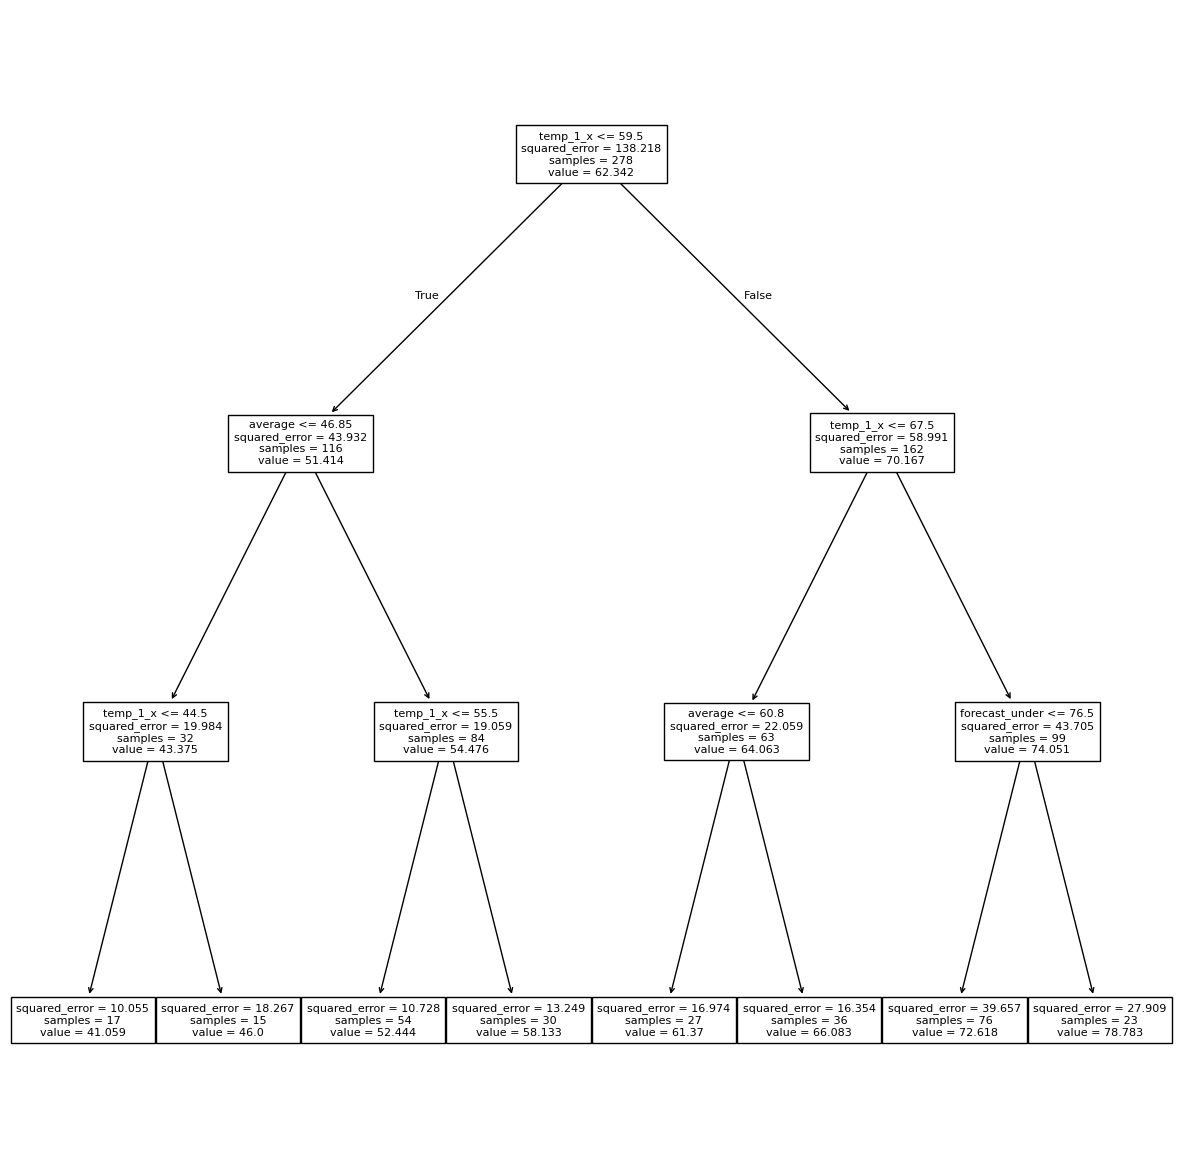

In [40]:
from  sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))  
plot_tree(dtr3,
          feature_names=X_test.columns,
          fontsize=8)       
plt.show()

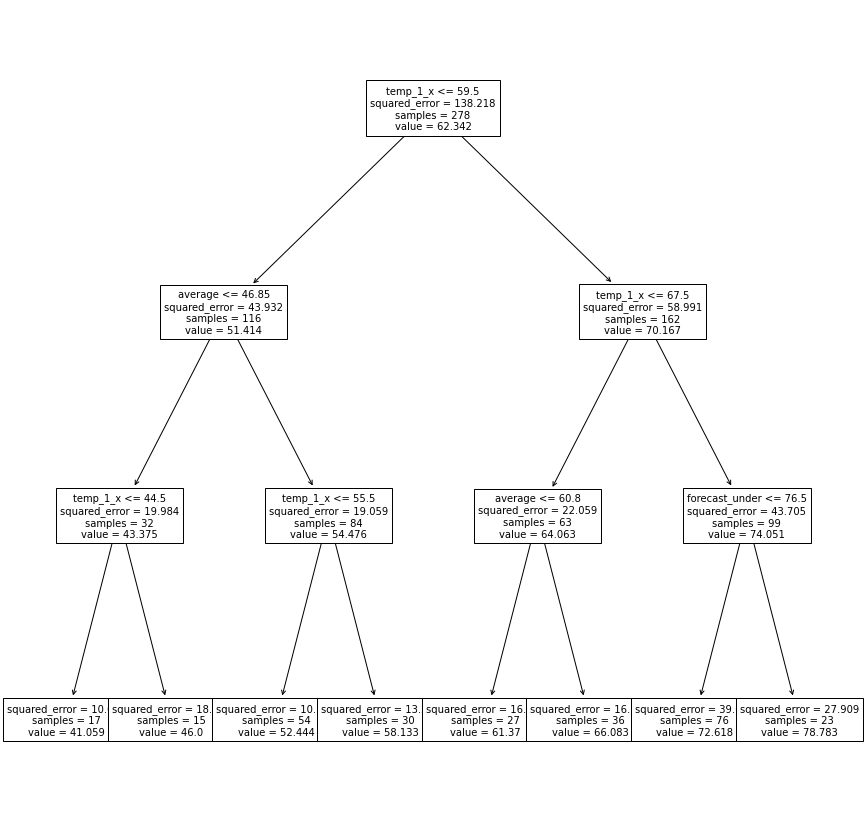

In [64]:
plt.figure(figsize=(15,15))

# mejor no?

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [ ]:
# Coeficientes
dtr3.feature_importances_

array([0.        , 0.        , 0.88020751, 0.09902152, 0.        ,
       0.        , 0.02077097, 0.        , 0.        ])

In [133]:
# Columnas
X_test.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [65]:
# importancias

array([0.        , 0.        , 0.88020751, 0.09902152, 0.        ,
       0.        , 0.02077097, 0.        , 0.        ])

In [66]:
# columnas de X_train

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [136]:
X_test

,month,temp_2,temp_1_x,average,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
255,9,69,68,66.1,63,71,68,57,70.428571
114,4,59,60,60.7,59,65,60,50,66.433333
314,11,53,48,48.0,46,48,49,44,56.966667
268,10,60,62,61.0,60,63,63,52,63.900000
167,6,67,65,70.4,69,73,70,58,73.233333
...,...,...,...,...,...,...,...,...,...
93,4,60,57,56.8,53,59,57,64,66.433333
180,7,73,76,73.3,70,77,73,84,76.225806
183,7,71,68,74.0,72,77,74,62,76.225806
197,7,80,73,76.6,76,78,77,90,76.225806


In [43]:
pd.DataFrame({"Features" : X_test.columns, "Importance" : dtr3.feature_importances_}).sort_values(by="Importance",ascending=False)

,Features,Importance
2,temp_1_x,0.880208
3,average,0.099022
6,forecast_under,0.020771
0,month,0.000000
1,temp_2,0.000000
4,forecast_noaa,0.000000
5,forecast_acc,0.000000
7,friend,0.000000
8,temp_1_y,0.000000


In [68]:
pd.DataFrame({'features': ???, 'importances': ???}).sort_values('importances', ascending=False)

,features,importances
2,temp_1_x,0.880208
3,average,0.099022
6,forecast_under,0.020771
0,month,0.000000
1,temp_2,0.000000
4,forecast_noaa,0.000000
5,forecast_acc,0.000000
7,friend,0.000000
8,temp_1_y,0.000000


FIJAOS QUE SOLO USA 3 COLUMNAS...

In [27]:
# repetimos train test split pero solo nos quedamos las columnas que sirven para algo ['temp_1_x','average','forecast_under']
X = X.loc[:,["temp_1_x","average","forecast_under"]]
X

,temp_1_x,average,forecast_under
0,45,45.6,44
1,45,45.7,44
2,44,45.8,47
3,41,45.9,46
4,40,46.0,46
...,...,...,...
343,42,45.2,47
344,47,45.3,44
345,48,45.3,45
346,48,45.4,44


In [37]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print("X_train", X_train.shape)
print("X_train", X_test.shape)
print("X_train", y_train.shape)
print("X_train", y_test.shape)


X_train (278, 3)
X_train (70, 3)
X_train (278,)
X_train (70,)


In [38]:
dtr_3 = DecisionTreeRegressor(max_depth=3)
dtr_3.fit(X_train,y_train)
y_pred = dtr_3.predict(X_test)


In [39]:
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7608677663462975
MAE 4.424444494299118
MAPE 0.06938377135428464
MSE 33.43673777437395
RMSE 5.782450844959596


### 11. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día no va a hacer una temperatura máxima a 15ºC

VAMOS A TRANSFORMAR UN PROBLEMA DE REGRESION EN CLASIFICACION. GENERAREMOS UNA CLASE DONDE PONDREMOS 1 SI LA TEMPERATURA PASA DE 59 (GRADOS FAHRENHEIT), Y SI NO 0.

In [40]:
temperature_data['target_clas'] = np.where(temperature_data['actual']>59,1,0)
temperature_data[['actual','target_clas']].head()

,actual,target_clas
0,45,0
1,44,0
2,41,0
3,40,0
4,44,0


In [32]:
df['target_clas'] = np.where(df['actual']>59,1,0)
df[['actual','target_clas']].head()

NameError: name 'df' is not defined

<Axes: >

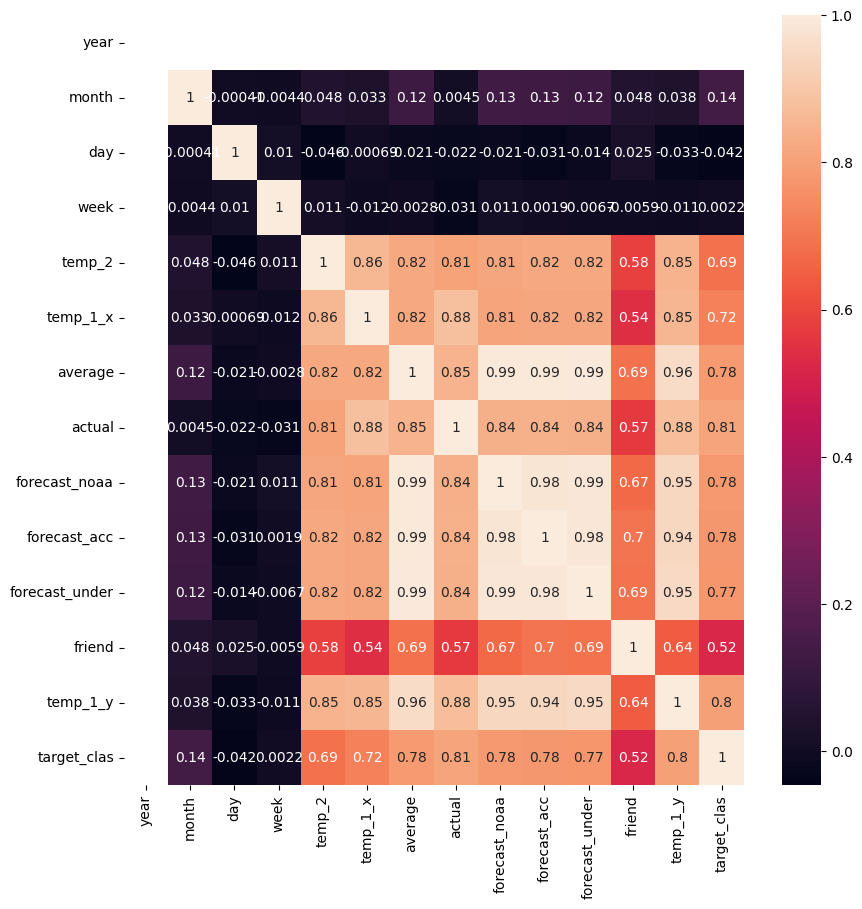

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(temperature_data.corr(), annot=True)

<AxesSubplot:>

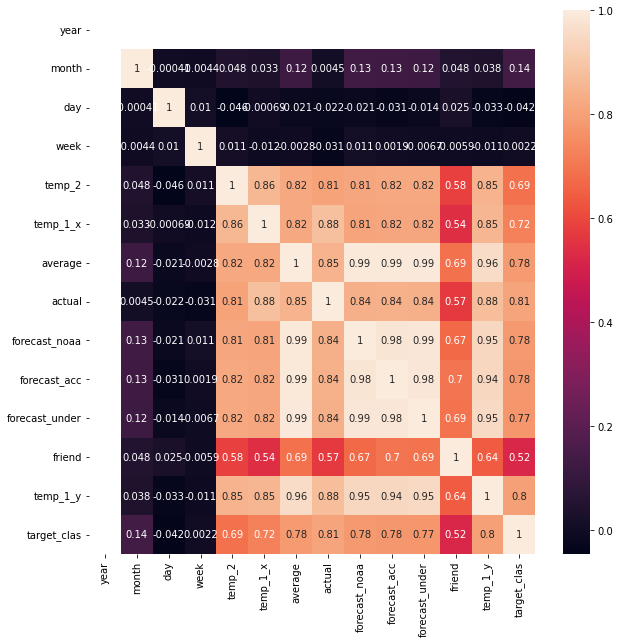

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [41]:
temperature_data.loc[:,"target_clas"].value_counts()

target_clas
1    204
0    144
Name: count, dtype: int64

In [81]:
df['target_clas'].value_counts()

1    204
0    144
Name: target_clas, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(temperature_data.drop(columns=['year','day','week','actual','target_clas']), temperature_data['target_clas'], test_size=0.2, random_state=42)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['year','day','week','actual','target_clas']), df['target_clas'], test_size=0.2, random_state=42)

In [43]:
# ENRTRENA UN MODELO DE CLASIFICACION LLAMADO dtc
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
# ENRTRENA UN MODELO DE CLASIFICACION LLAMADO dtc

DecisionTreeClassifier(max_depth=3)

In [44]:
y_pred = dtc.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0])

In [94]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [45]:
dtc.feature_importances_

array([0.        , 0.        , 0.09828577, 0.83792502, 0.05793051,
       0.        , 0.        , 0.0058587 , 0.        ])

In [93]:
# dtc feature importance

array([0.        , 0.        , 0.08751759, 0.83792502, 0.05793051,
       0.        , 0.01076818, 0.0058587 , 0.        ])

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [46]:
accuracy_score(y_test,y_pred)

0.9142857142857143

In [89]:
# accuracy de dtc en test

0.9

In [83]:
y_train

177    1
78     0
90     1
16     0
66     0
      ..
188    1
71     0
106    1
270    1
102    1
Name: target_clas, Length: 278, dtype: int64

In [89]:
X_train

,month,temp_2,temp_1_x,average,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
177,6,85,79,72.6,68,76,74,81,73.233333
78,3,55,56,54.6,51,55,54,64,56.483871
90,4,71,63,56.3,54,61,56,64,66.433333
16,1,48,54,47.4,45,51,46,47,49.677419
66,3,54,55,52.8,49,55,53,50,56.483871
...,...,...,...,...,...,...,...,...,...
188,7,74,71,75.1,71,77,76,95,76.225806
71,3,54,49,53.6,49,58,52,70,56.483871
106,4,77,89,59.0,59,63,59,61,66.433333
270,10,66,60,60.2,56,64,60,78,63.900000


In [47]:
print(dtc.classes_)
print(type(dtc.classes_))

[0 1]
<class 'numpy.ndarray'>


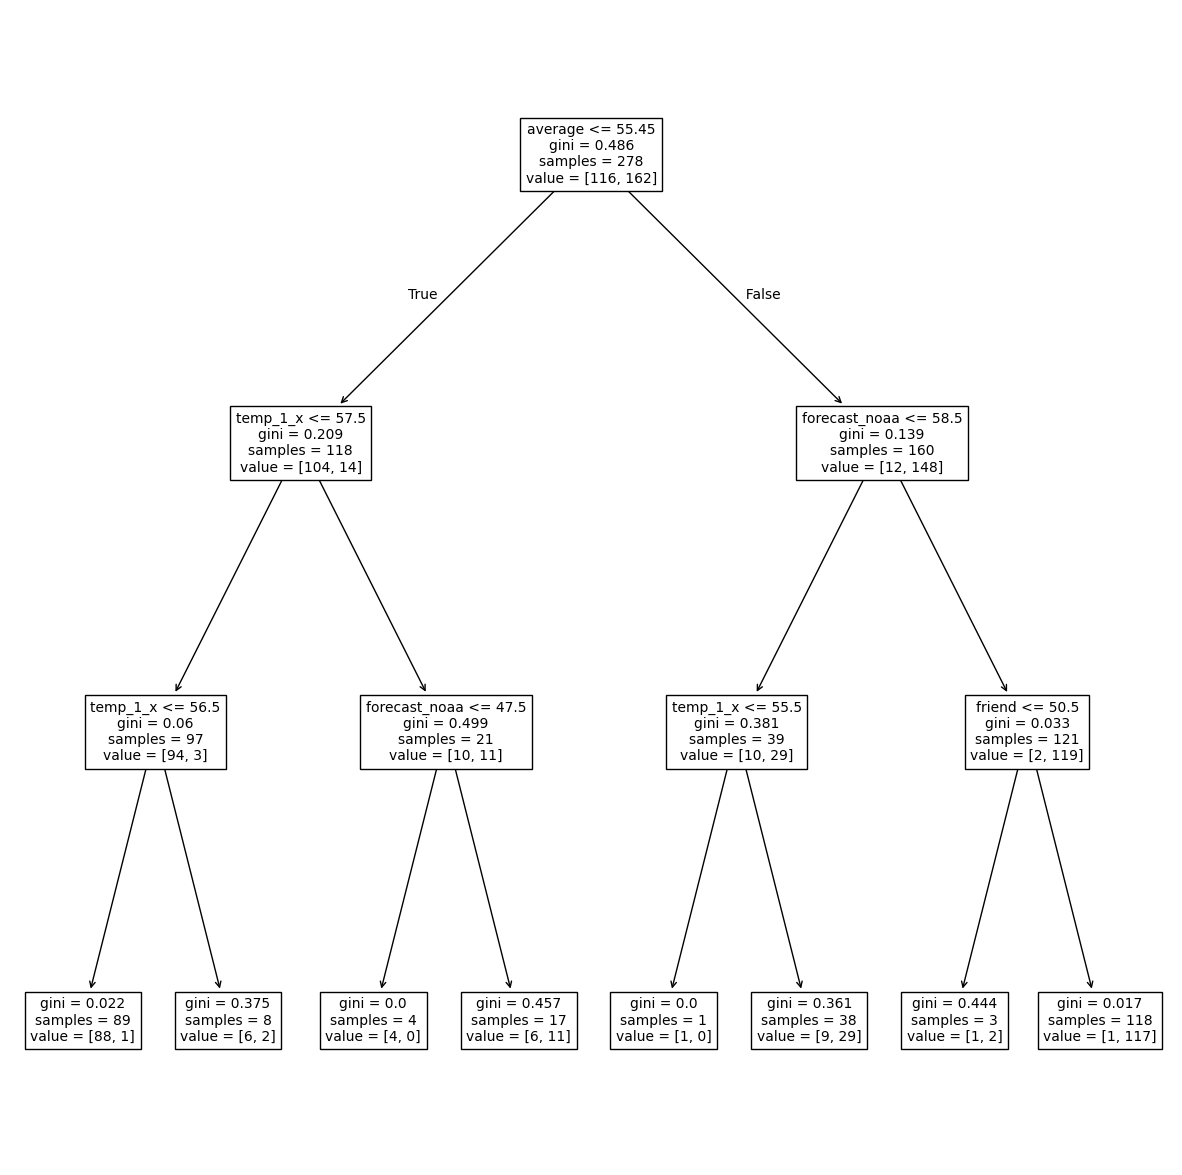

In [95]:
plt.figure(figsize=(15,15))

plot_tree(dtc, feature_names = X_train.columns, fontsize=10); #max_depth cambia la profundidad de la visualización

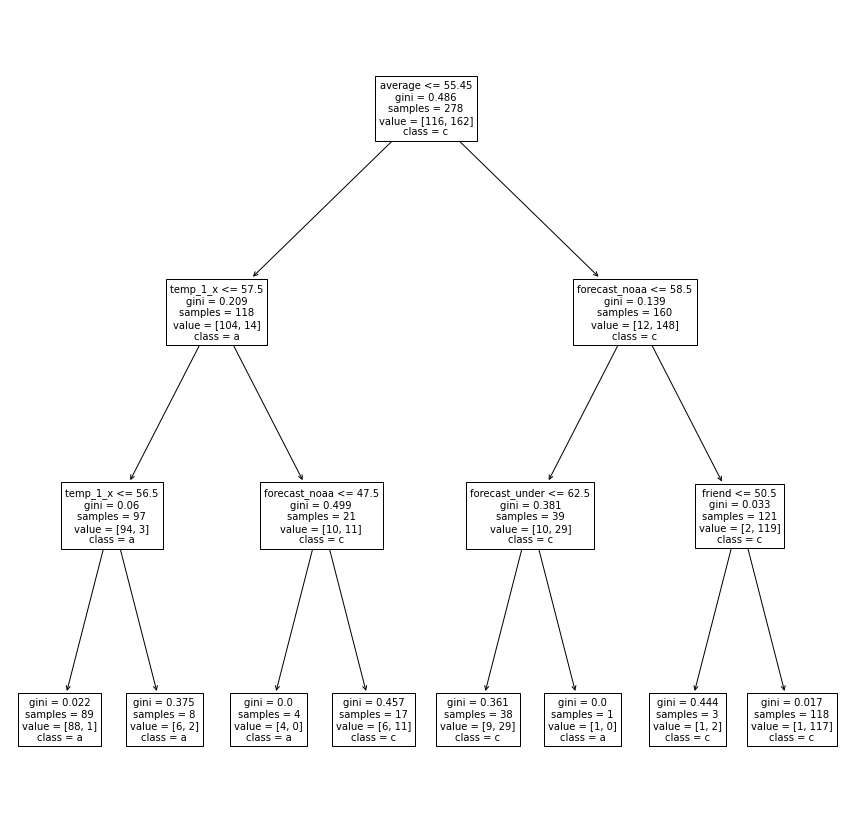

In [90]:
plt.figure(figsize=(15,15))

plot_tree(dtc, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

COMPARA LA ACCURACY CON UN LOGISTIC REGRESSOR A PELO

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_y_predict = lr.predict(X_test)




c:\Users\Usuario\miniconda3\envs\data_analysis_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [49]:
accuracy_score(y_test,lr_y_predict)



0.7714285714285715

In [95]:
from sklearn.linear_model import LogisticRegression

# lr
# lr.fit
# accuracy_acore(..., ...)

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8428571428571429

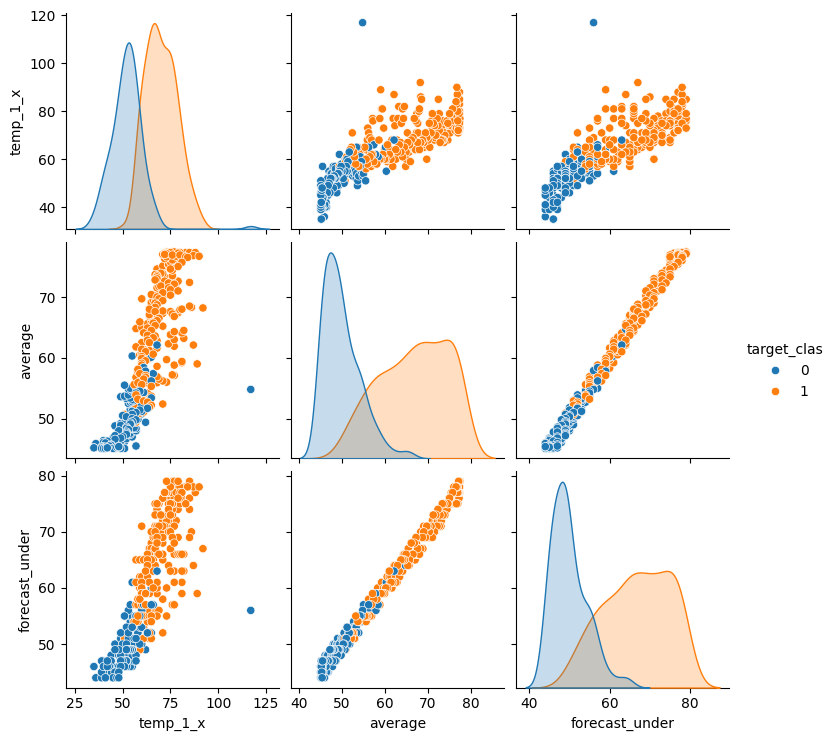

In [105]:
sns.pairplot(temperature_data[['temp_1_x','average','forecast_under','target_clas']], hue='target_clas')

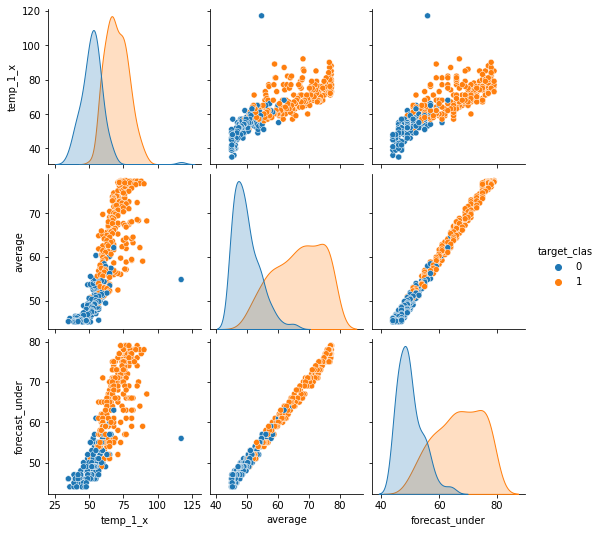

In [97]:
sns.pairplot(df[['temp_1_x','average','forecast_under','target_clas']], hue='target_clas')

### 12. BONUS TRACK: Repite el experimEnto con un un nuevo modelo `RandomForestClassifier` . A lo facil

In [98]:
from sklearn.ensemble import RandomForestClassifier

rfc = ...

RandomForestClassifier(max_depth=3)

In [99]:
accuracy_score(y_test,rfc.predict(X_test))

0.9428571428571428